This notebook is used for statisticaly analyse a sample of real DNA sequences. Those stats are used for error corrections.
The data bases used are: [UCSC Genome Browser](https://genome-euro.ucsc.edu/cgi-bin/hgGateway?token=0.alae9SNJWSG9YVfLP5Tja_K1qR7KPAer7Wq0cYUGxntYv451eBTYAyiwHoVmCQyn-QEy_KFIIqqiOXCqbu_eZTJKkHBbixmGmp954gHew5pR49titMPciB1d5WX6E5XDR0hY_QOxtHEvQlSiddNbB3zextrbBzlUfzJypEKHRk8e5ooQrswN7JZ9rPOmHXpa_TqD_vAAqgVaOCpJYg8RDCv1pHWqUYxW1G3CtILQZOMHg6DKfTpfKXC3kbvT1MTK-nhw1KJzrN8fT3LsW3xKp9b1JCXqMn9Be7QyQnL6AHI2dIDzLNamidW21tnooExzVKlPNc9Kqe12KdVruB8ejHftTarjX1A7S81bBRMJVGXGXFe_RuzSDyx8HRyior70lCIg0Sy6nnHYjLiajZx_mdva2m1tQQyzv5KXZEvcztTWJsJ3oBJzs2ztwvDAbIQnyfoB2bypzTecPl9huQpo-8P5KWwErFNMb7qOnlv-Ny7ljU4A1jvCTxtY9kKriNpwbWDlj6xPTWRNSp76ygKAdI5TBWakRbu_rooxqThj0cMSH0pM2bNuIy41cofG2_fifVkeFI9lPVBUnFpjHwYLtuLU5R5aNwFpqvpj5rkY-zuTon_5Aji-DwjS5rgPErHxPulV27jWQPlBgIrHJNSDLX2vdohzt1v6W5mg9sroIjx-F8AEkWBLL67Jyy0tbrLvvk9K3GQ6uGJXsUgCy7YDvehjTsLAyedGvIqckhlE6B9-okKwC9XrG1ms4Akg8btoYJARQBe-w3YSc1rgf538WGF01znPdNKd44hH-daXB_ag9LR8JbIsQuFImS7UZG0nPSlj__vLdSKlu9MrZpTHqnCwvtYYcrvG3Lx6mB30QxZkQsoklGahGxwPBXEfJ3zo.5ilOfETFBtdOuAUyZl5Yxw.da5bf71d2a5fb514df563ee6acdedd9750e6ae08b48cca10595c10e5ee9ca870&redirect=manual&source=genome.ucsc.edu) and [NCBI RefSeq](https://www.ncbi.nlm.nih.gov/refseq/)

## Header

In [1]:
import matplotlib.pyplot as plt
from typing import Dict
from Bio import SeqIO
import polars as pl
import yaml

## Plot

In [2]:
def plot(data: Dict[str, float], xlabel:str, Specifies:str):
    keys = list(data.keys())
    values = list(data.values())

    plt.bar(keys, values)

    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.title(f"{Specifies} {xlabel} Distribution")
    plt.show()

## Stats Calculator

In [3]:
def calcStats(dnaSequencePath: str, aminoAcidPath: str, Specifies: str) -> None:
    # bases
    data=[]
    for record in SeqIO.parse(dnaSequencePath, "fasta"):
        data.append({
            "length": len(record.seq),
            "sequence": str(record.seq)
        })

    dataFrame = pl.DataFrame(data)
    baseDistribution = {}

    length = int(dataFrame["length"].sum())
    for base in ["A", "T", "G", "C"]:
        dataFrame = dataFrame.with_columns([(pl.col("sequence").str.count_matches(base) + pl.col("sequence").str.count_matches(base.lower())).alias(base)])
        baseDistribution[base] = float(100 * dataFrame[base].sum() / length)

    # codons
    data = []
    for record in SeqIO.parse(aminoAcidPath, "fasta"):
        data.append({
            "length": len(record.seq), 
            "sequence": str(record.seq)})

    dataFrame = pl.DataFrame(data)

    aminoAcidDistribution = {}
    length = int(dataFrame["length"].sum())

    for aminoAcid in ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]:
        dataFrame = dataFrame.with_columns(pl.col("sequence").str.count_matches(aminoAcid).alias(aminoAcid))
        aminoAcidDistribution[aminoAcid] = float(100 * dataFrame[aminoAcid].sum() / length)

    with open('statistics.yaml', 'w') as file:
        yaml.dump({
            Specifies :{
                "amino_acid_distribution" : aminoAcidDistribution,
                "bases_distribution" : baseDistribution
                }
            }, file)
    dataFrame.clear()

    # plotting
    plot(baseDistribution, "Bases", Specifies)
    plot(aminoAcidDistribution, "Amino-acid", Specifies)

## Run

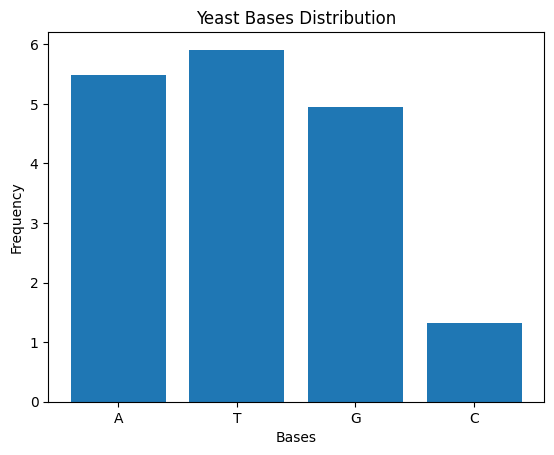

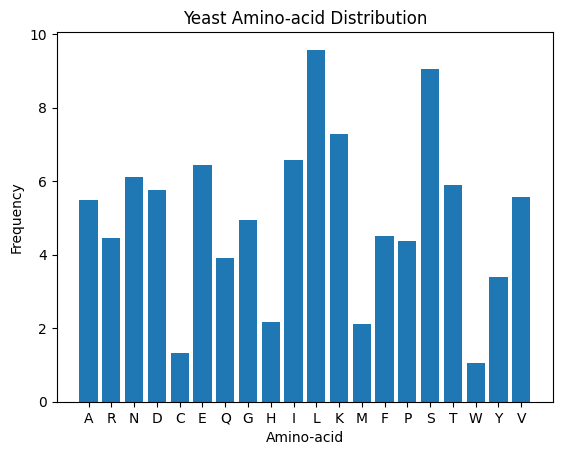

In [4]:
calcStats("../data/yeast_test_proteins.fasta", "../data/yeast_test_proteins.fasta", "Yeast")